# Data Visualization Assignment 4 - Sanjay Roberts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import geopandas as gpd
import shapely
import bokeh
from plotnine import *
import json
from shapely.geometry import Point, LineString, Polygon
from shapely.geometry import box

## Assignment 4, Part1: 
Using the file capitals_lat_lon.csv, form a data frame and write out an HTML file which when rendered in a browser displays a marker for each capital city. Hint: use folium.


In [2]:
df = pd.read_csv('capitals_lat_lon.csv')

In [3]:
df.head()

,Country,Capital,Latitude,Longitude
0,Abkhazia,Sukhumi,43.001525,41.023415
1,Afghanistan,Kabul,34.575503,69.240073
2,Aland Islands,Mariehamn,60.100000,19.933333
3,Albania,Tirana,41.327546,19.818698
4,Algeria,Algiers,36.752887,3.042048


#### HTML file found at Map_A4P1.html

In [4]:
clist=[]
for i in range(len(df)):
    clist.append([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']])

map=folium.Map(location=[39.7,-105], zoom_start=1)  
for c in clist:
    map.add_child(folium.Marker(location=c,popup="Capital city",
      icon=folium.Icon(color='blue')))
map.save("Map_A4P1.html")
map

## Assignment 4, Part 2: 
Estimate the latitude and longitude for three points of a triangle that would just cover Africa or come close. (Hint: Rabat, Capetown, and Mogadishu, for example.) 

Use folium to demonstrate where the points are on the map so that a person could see at a glance that they do. 

Use Shapely to define a polygon from those three points. Compute the area and perimeter of the triangle assuming flat earth and allowing each degree of latitude and each degree of longitude to be considered one unit of length.


In [5]:
cap_list = ['Rabat','Mogadishu']
capetown = {"Country":'South Africa', "Capital":'Capetown', "Latitude":-33.92584 ,'Longitude':18.42322}
df_triangle = df[df['Capital'].isin(cap_list)]
df_triangle = df_triangle.append(capetown, ignore_index=True)
df_triangle

,Country,Capital,Latitude,Longitude
0,Morocco,Rabat,33.971590,-6.849813
1,Somalia,Mogadishu,2.046934,45.318162
2,South Africa,Capetown,-33.925840,18.423220


#### HTML file found at Map_A4P2.html

In [6]:
clist=[]
for i in range(len(df_triangle)):
    clist.append([df_triangle.iloc[i]['Latitude'], df_triangle.iloc[i]['Longitude']])

map=folium.Map(location=[3,-5], zoom_start=3)  
for c in clist:
    map.add_child(folium.Marker(location=c,popup="Capital city",
      icon=folium.Icon(color='blue')))
map.save("Map_A4P2.html")  
map

In [7]:
poly1=Polygon([(33.971590,-6.849813),(2.046934,45.318162),(-33.925840,18.423220)])
print("Polygon area is:")
print(poly1.area)
print("Polygon perimeter is:")
print(poly1.length)

Polygon area is:
1367.619273101301
Polygon perimeter is:
178.52485873547602


## Assignment 4, Part 3: 
Estimate the boundaries for Kansas (use just four lat-lon points) and Nebraska (use just six points). Construct a geojson file from that. Then write a Python program to read that file, form a dictionary, and plot the result.


In [8]:
#Coordinates for each state

#Kansas
(40.002349, -102.050900)
(36.993083, -102.042102)
(37.000063, -94.618802)
(39.896351, -94.941153)


#Nebraska
(40.007567, -95.318134)
(42.603966, -96.724396)
(42.998584, -104.037077)
(41.005318, -104.052639)
(41.008561, -102.052018)
(40.006489, -102.048463)


(40.006489, -102.048463)

#### Geojson file for KS and NE, saved in simple_geo1.json

In [9]:
# {"type": "FeatureCollection",
# "features": [
# { "type": "Feature", "id": "KS",
# "geometry": { "type": "Polygon", "coordinates": [[[-102.050900,40.002349],
# [-102.042102,36.993083], [-94.618802,37.000063], [-94.941153,39.896351]]] }},
# { "type": "Feature", "id": "NE",
# "geometry": { "type": "Polygon", "coordinates": [[[-95.318134, 40.007567], [-96.724396, 42.603966],
# [-104.037077, 42.998584],[-104.052639, 41.005318],[-102.052018, 41.008561],[-102.048463, 40.006489]]]}}]}

In [10]:
with open('simple_geo1.json') as json_data:
    d=json.load(json_data)
d

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 'KS',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-102.0509, 40.002349],
      [-102.042102, 36.993083],
      [-94.618802, 37.000063],
      [-94.941153, 39.896351]]]}},
  {'type': 'Feature',
   'id': 'NE',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-95.318134, 40.007567],
      [-96.724396, 42.603966],
      [-104.037077, 42.998584],
      [-104.052639, 41.005318],
      [-102.052018, 41.008561],
      [-102.048463, 40.006489]]]}}]}

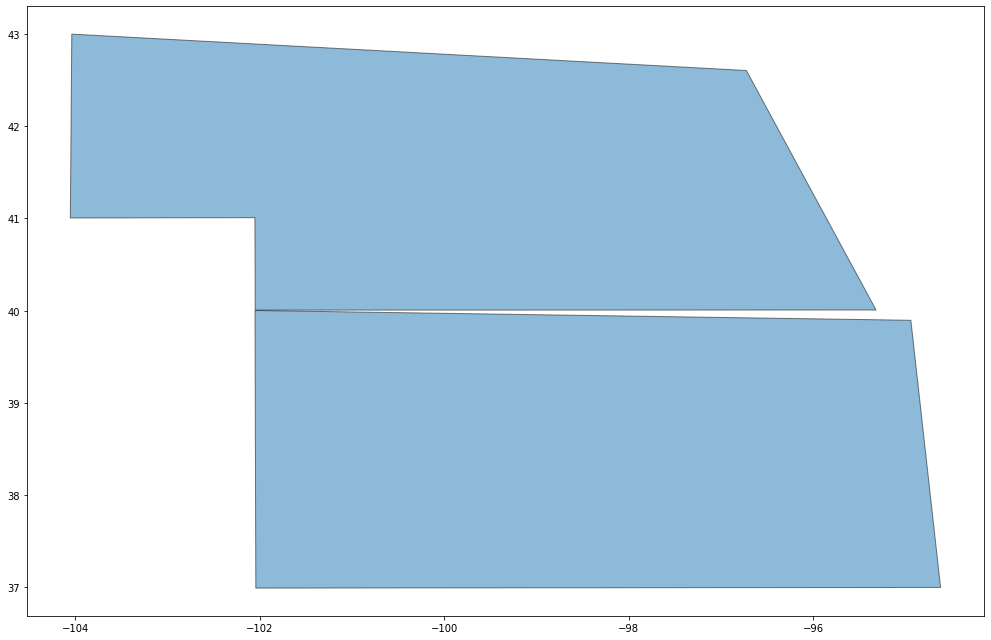

In [11]:
df1=gpd.read_file('simple_geo1.json')
ax=df1.plot(figsize=(15,9), alpha=0.5, edgecolor='k')
plt.tight_layout()
plt.show()


## Assignment 4, Part 4: 
Generate at random the “happiness index” for each state in the USA. Provide a choropleth of the USA with that data represented thereon.


In [12]:
happiness_values = np.random.randint(low=1, high=100, size=50)

In [13]:
states_df = pd.read_csv('list_of_states.csv')

In [14]:
states_df['Happiness']=happiness_values

In [15]:
states_df.head()

,State,Happiness
0,AL,65
1,AK,2
2,AZ,66
3,AR,61
4,CA,61


In [16]:
state_geo = 'us-states.json'

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=states_df,
    columns=['State', 'Happiness'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=1,
    line_opacity=1,
    legend_name='Happiness Level (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

## Assignment 4, Part 5: 
Using plotnine and the built-in dataset diamonds, plot price vs. carat. Put the sub-plots into a facet grid based on both cut and clarity.


In [17]:
from plotnine.data import diamonds

In [18]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [19]:
import warnings
warnings.filterwarnings('ignore')

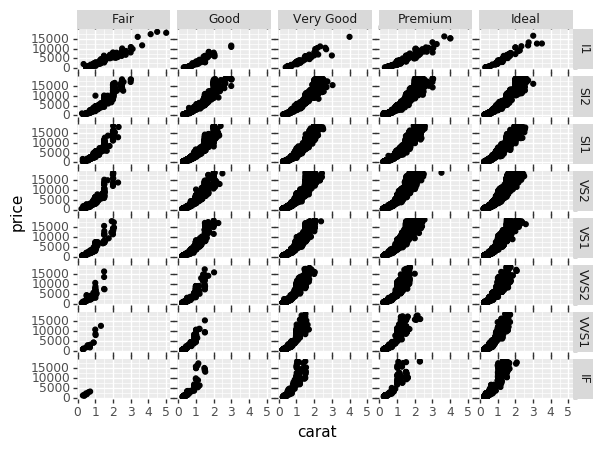

<ggplot: (302735438)>


In [20]:
g2 = ( ggplot(data=diamonds) +
  geom_point(mapping=aes(x='carat',y='price')) +
  facet_grid('clarity ~ cut', space='free') )
print(g2)


## Assignment 4, Part 6: 
Generate 500 points from the random exponential distribution. Choose your own parameters for that. Use Bokeh and plot a histogram of that distribution such that there are at least fifteen bins with counts greater than zero.


In [21]:
points = 100 + 15*np.random.exponential(size =500)

In [22]:
from bokeh.plotting import figure, show, output_file
output_file('histo.html')
xx, edges = np.histogram(points, bins=15,
  range=[98, 180])
df=pd.DataFrame({'xx': xx, 'left': edges[:-1],
  'right': edges[1:]})
print(df.head(15))
p=figure(plot_width=1200, plot_height=500)
p.quad(bottom=0, top=df['xx'], left=df['left'],
  right=df['right'], fill_color='red',
  line_color='black')
show(p)

     xx        left       right
0   114   98.000000  103.466667
1   116  103.466667  108.933333
2    76  108.933333  114.400000
3    64  114.400000  119.866667
4    42  119.866667  125.333333
5    28  125.333333  130.800000
6    17  130.800000  136.266667
7    12  136.266667  141.733333
8    13  141.733333  147.200000
9     6  147.200000  152.666667
10    3  152.666667  158.133333
11    2  158.133333  163.600000
12    3  163.600000  169.066667
13    3  169.066667  174.533333
14    0  174.533333  180.000000
